In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
import string, re, nltk
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPool1D, Flatten
from keras_preprocessing.sequence import pad_sequences
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r' )
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text

In [ ]:
load_doc('/content/drive/MyDrive/review_polarity/txt_sentoken/neg/cv000_29416.txt')

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [ ]:
# turn a doc into clean tokens
def clean_doc(doc):
  # split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile( '[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub( '' , w) for w in tokens]
  # remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
  # filter out stop words
  stop_words = set(stopwords.words( 'english' ))
  tokens = [w for w in tokens if not w in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  return tokens

In [ ]:
text = load_doc('/content/drive/MyDrive/review_polarity/txt_sentoken/neg/cv000_29416.txt')
clean_doc(text)

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'church',
 'party',
 'drink',
 'drive',
 'get',
 'accident',
 'one',
 'guys',
 'dies',
 'girlfriend',
 'continues',
 'see',
 'life',
 'nightmares',
 'whats',
 'deal',
 'watch',
 'movie',
 'sorta',
 'find',
 'critique',
 'mindfuck',
 'movie',
 'teen',
 'generation',
 'touches',
 'cool',
 'idea',
 'presents',
 'bad',
 'package',
 'makes',
 'review',
 'even',
 'harder',
 'one',
 'write',
 'since',
 'generally',
 'applaud',
 'films',
 'attempt',
 'break',
 'mold',
 'mess',
 'head',
 'lost',
 'highway',
 'memento',
 'good',
 'bad',
 'ways',
 'making',
 'types',
 'films',
 'folks',
 'didnt',
 'snag',
 'one',
 'correctly',
 'seem',
 'taken',
 'pretty',
 'neat',
 'concept',
 'executed',
 'terribly',
 'problems',
 'movie',
 'well',
 'main',
 'problem',
 'simply',
 'jumbled',
 'starts',
 'normal',
 'downshifts',
 'fantasy',
 'world',
 'audience',
 'member',
 'idea',
 'whats',
 'going',
 'dreams',
 'characters',
 'coming',
 'back',
 'dead',
 'others',

In [ ]:
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
  # load the doc
  doc = load_doc(filename)
  # clean doc
  tokens = clean_doc(doc)
  # filter by vocab
  tokens = [w for w in tokens if w in vocab]
  return ' ' .join(tokens)

In [ ]:
vocab = open('/content/drive/MyDrive/vocab.txt')
vocab = vocab.read().split()

In [ ]:
vocab

['sometimes',
 'tip',
 'hat',
 'film',
 'jump',
 'bandwagon',
 'enjoy',
 'ride',
 'saw',
 'truman',
 'show',
 'audience',
 'full',
 'teenagers',
 'doubt',
 'drawn',
 'ace',
 'ventura',
 'hoping',
 'see',
 'latest',
 'take',
 'fart',
 'jokes',
 'surprised',
 'may',
 'realized',
 'picture',
 'actually',
 'something',
 'say',
 'crowd',
 'id',
 'cant',
 'tell',
 'yet',
 'really',
 'good',
 'seems',
 'comparison',
 'awful',
 'mountain',
 'crap',
 'spewed',
 'forth',
 'bowls',
 'hollywood',
 'far',
 'year',
 'time',
 'alone',
 'make',
 'call',
 'end',
 'burbanks',
 'side',
 'concerned',
 'wanted',
 'win',
 'felt',
 'tribute',
 'jim',
 'carrey',
 'achieved',
 'legitimacy',
 'last',
 'best',
 'viewed',
 'cold',
 'little',
 'possible',
 'plot',
 'unless',
 'youre',
 'media',
 'blackout',
 'however',
 'probably',
 'know',
 'basics',
 'stars',
 'burbank',
 'everyman',
 'insurance',
 'agent',
 'living',
 'beautiful',
 'wife',
 'meryl',
 'laura',
 'linney',
 'south',
 'florida',
 'island',
 'town',

In [ ]:
listdir('/content/drive/MyDrive/review_polarity/txt_sentoken/neg/')

['cv006_17022.txt',
 'cv007_4992.txt',
 'cv047_18725.txt',
 'cv056_14663.txt',
 'cv062_24556.txt',
 'cv023_13847.txt',
 'cv055_8926.txt',
 'cv037_19798.txt',
 'cv036_18385.txt',
 'cv010_29063.txt',
 'cv059_28723.txt',
 'cv030_22893.txt',
 'cv024_7033.txt',
 'cv001_19502.txt',
 'cv029_19943.txt',
 'cv022_14227.txt',
 'cv016_4348.txt',
 'cv020_9234.txt',
 'cv032_23718.txt',
 'cv044_18429.txt',
 'cv008_29326.txt',
 'cv003_12683.txt',
 'cv052_29318.txt',
 'cv060_11754.txt',
 'cv051_10751.txt',
 'cv038_9781.txt',
 'cv002_17424.txt',
 'cv028_26964.txt',
 'cv063_28852.txt',
 'cv015_29356.txt',
 'cv026_29229.txt',
 'cv027_26270.txt',
 'cv019_16117.txt',
 'cv025_29825.txt',
 'cv039_5963.txt',
 'cv053_23117.txt',
 'cv057_7962.txt',
 'cv034_29446.txt',
 'cv005_29357.txt',
 'cv033_25680.txt',
 'cv054_4101.txt',
 'cv040_8829.txt',
 'cv004_12641.txt',
 'cv046_10613.txt',
 'cv045_25077.txt',
 'cv050_12128.txt',
 'cv009_29417.txt',
 'cv000_29416.txt',
 'cv017_23487.txt',
 'cv049_21917.txt',
 'cv061_93

In [ ]:
doc_to_line('/content/drive/MyDrive/review_polarity/txt_sentoken/neg/cv000_29416.txt', vocab)

'plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares whats deal watch movie sorta find critique mindfuck movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films attempt break mold mess head lost highway memento good bad ways making types films folks didnt snag one correctly seem taken pretty neat concept executed terribly problems movie well main problem simply jumbled starts normal downshifts fantasy world audience member idea whats going dreams characters coming back dead others look like dead strange apparitions disappearances chase scenes tons weird things happen simply explained personally dont mind trying unravel film every give clue get kind fed films biggest problem obviously got big secret hide seems want hide completely final five minutes make things entertaining thrilling even engaging meantime really sad part arrow dig flicks like actually 

In [ ]:
# load all docs in a directory
def process_docs(directory, is_train):
  documents = list()
  # walk through all files in the folder
  for filename in listdir(directory):
    # skip any reviews in the test set
    if is_train and filename.startswith( 'cv9' ):
      continue
    if not is_train and not filename.startswith( 'cv9' ):
      continue
    # create the full path of the file to open
    path = directory + '/' + filename
    # load the doc
    doc = load_doc(path)
    # clean doc
    tokens = clean_doc(doc)
    # add to list
    documents.append(tokens)
  return documents

In [ ]:
# load and clean a dataset
def load_clean_dataset(is_train):
  # load documents
  neg = process_docs('/content/drive/MyDrive/review_polarity/txt_sentoken/neg', is_train)
  pos = process_docs('/content/drive/MyDrive/review_polarity/txt_sentoken/pos', is_train)
  docs = neg + pos
  # prepare labels
  labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
  return docs, labels

In [ ]:
train, train_labels = load_clean_dataset( True)
test, test_labels = load_clean_dataset(False)

In [ ]:
len(train), len(train_labels)

(1810, 1810)

In [ ]:
len(test), len(test_labels)

(200, 200)

Preprocess the text

In [ ]:
# fit a tokenizer
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [ ]:
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
  # integer encode
  encoded = tokenizer.texts_to_sequences(docs)
  # pad sequences
  padded = pad_sequences(encoded, maxlen=max_length, padding= 'post' )
  return padded

Build the model

In [ ]:
# define the model
def define_model(vocab_size, max_length):
  model = Sequential()
  model.add(Embedding(vocab_size, 100, input_length=max_length))
  model.add(Conv1D(filters=32, kernel_size=8, activation= 'relu' ))
  model.add(MaxPool1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(10, activation= 'relu' ))
  model.add(Dense(1, activation= 'sigmoid' ))
  # compile network
  model.compile(loss='binary_crossentropy',
                optimizer= 'adam',metrics=['accuracy'])
  return model

In [ ]:
# load all reviews
train_docs, ytrain = load_clean_dataset(True)
test_docs, ytest = load_clean_dataset(False)

In [ ]:
len(train_docs), len(test_docs)

(1810, 200)

In [ ]:
# create the tokenizer
tokenizer = create_tokenizer(train_docs)

In [ ]:
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print( 'Vocabulary size: %d ' % vocab_size)

Vocabulary size: 44277 


In [ ]:
# calculate the maximum sequence length
max_length = max([len(s) for s in train_docs])
print( ' Maximum length: %d ' % max_length)

 Maximum length: 1380 


In [ ]:
# encode data
Xtrain = encode_docs(tokenizer, max_length, train_docs)
Xtest = encode_docs(tokenizer, max_length, test_docs)

In [ ]:
Xtrain.shape

(1810, 1380)

In [ ]:
Xtrain

array([[  818,  1971, 25868, ...,     0,     0,     0],
       [   89,   334,    97, ...,     0,     0,     0],
       [ 2228,   152,     3, ...,     0,     0,     0],
       ...,
       [10024,  8535, 13460, ...,     0,     0,     0],
       [  637,  9934,  2368, ...,     0,     0,     0],
       [ 1556,   125,  2444, ...,     0,     0,     0]], dtype=int32)

In [ ]:
Xtest

array([[ 6680,  6471, 14710, ...,     0,     0,     0],
       [   39,   346,     3, ...,     0,     0,     0],
       [14292,  2779,   503, ...,     0,     0,     0],
       ...,
       [  327,   454, 13271, ...,     0,     0,     0],
       [11446,  7707, 23806, ...,     0,     0,     0],
       [ 5684,    99,   891, ...,     0,     0,     0]], dtype=int32)

In [ ]:
# define model
model = define_model(vocab_size, max_length)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1380, 100)         4427700   
                                                                 
 conv1d (Conv1D)             (None, 1373, 32)          25632     
                                                                 
 max_pooling1d (MaxPooling1  (None, 686, 32)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 21952)             0         
                                                                 
 dense (Dense)               (None, 10)                219530    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

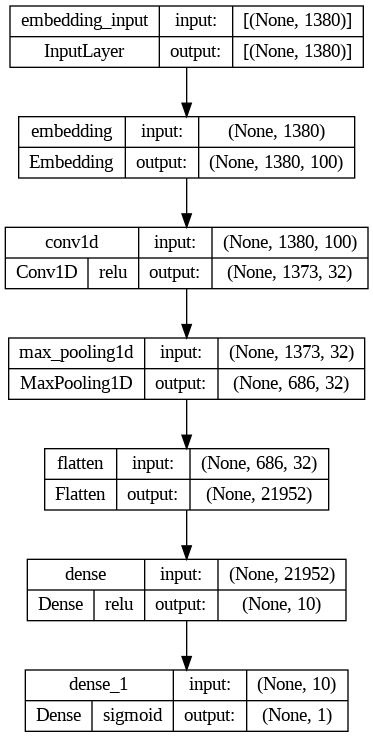

In [ ]:
plot_model(model, show_layer_activations=True, show_shapes=True, show_layer_names=True)

Train the model

In [ ]:
# fit network
model.fit(Xtrain, np.array(ytrain), epochs=10, batch_size=10)

Epoch 1/10
181/181 [==============================] - 25s 137ms/step - loss: 0.1288 - accuracy: 0.9895
Epoch 2/10
181/181 [==============================] - 31s 171ms/step - loss: 0.1190 - accuracy: 0.9895
Epoch 3/10
181/181 [==============================] - 23s 127ms/step - loss: 0.1106 - accuracy: 0.9895
Epoch 4/10
181/181 [==============================] - 22s 123ms/step - loss: 0.1034 - accuracy: 0.9895
Epoch 5/10
181/181 [==============================] - 24s 134ms/step - loss: 0.0970 - accuracy: 0.9895
Epoch 6/10
181/181 [==============================] - 22s 123ms/step - loss: 0.0914 - accuracy: 0.9895
Epoch 7/10
181/181 [==============================] - 24s 131ms/step - loss: 0.0865 - accuracy: 0.9895
Epoch 8/10
181/181 [==============================] - 23s 127ms/step - loss: 0.0881 - accuracy: 0.9878
Epoch 9/10
181/181 [==============================] - 22s 124ms/step - loss: 0.0933 - accuracy: 0.9823
Epoch 10/10
181/181 [==============================] - 24s 133ms/step - l

Evaluate on test data

In [ ]:
model.evaluate(Xtest, np.array(ytest), batch_size=1)

200/200 [==============================] - 1s 4ms/step - loss: 0.5843 - accuracy: 0.8050


[0.5842854976654053, 0.8050000071525574]

Predict on unseen data

In [ ]:
# test positive text
text1 = ' Best movie ever! It was great, I will definitely recommend it. '
text2 = ' This is a bad movie. Please dont watch it. Wastage of money.'

In [ ]:
# classify a review as negative or positive
def predict_sentiment(review):
  # clean the data
  tokens = clean_doc(review)
  # create the string
  line = ' ' .join(tokens)
  encoded = encode_docs(tokenizer, max_length, line)
  # encoded = tokenizer.texts_to_matrix([line], mode= 'binary' )
  # predict sentiment
  yhat = model.predict(encoded, verbose=0)
  # retrieve predicted percentage and label
  percent_pos = yhat[0,0]
  if round(percent_pos) == 0:
    return (1-percent_pos), 'NEGATIVE'
  return percent_pos, 'POSITIVE'

In [ ]:
predict_sentiment(text1)

(0.9082913249731064, 'NEGATIVE')

In [ ]:
predict_sentiment(text2)

(0.9082913249731064, 'NEGATIVE')